In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#from sklearn.preprocessing import LabelEncoder
#from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

### Exploring Data and preprocessing

In [15]:
class_names=['Diseased','Healthy']
flat_data_arr=[] #input array
target_arr=[] #output array
data_dir='/content/drive/MyDrive/Colab Notebooks/machine vision system project'

#path which contains all the class_names of images
for i in class_names:

    print(f'loading... category : {i}')
    path=os.path.join(data_dir,i)
    print(path)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        flat_data_arr.append(img_array.flatten())
        target_arr.append(class_names.index(i))
    print(f'loaded category:{i} successfully')

flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target

x=df.iloc[:,:-1] #input data
y=df.iloc[:,-1] #output data

print("x:",x.shape)
print("y:",y.shape)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=77,stratify=y)

print('Splitted Successfully')

loading... category : Diseased
/content/drive/MyDrive/Colab Notebooks/machine vision system project/Diseased
loaded category:Diseased successfully
loading... category : Healthy
/content/drive/MyDrive/Colab Notebooks/machine vision system project/Healthy
loaded category:Healthy successfully
x: (421, 30000)
y: (421,)
Splitted Successfully


In [16]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
223,248,222,206,249,223,207,253,221,208,253,...,139,177,148,139,177,148,139,177,148,139
266,253,253,253,253,253,253,253,253,253,253,...,253,253,253,253,253,253,253,253,253,253
352,183,160,152,183,160,152,183,160,152,183,...,192,233,197,191,234,198,192,237,201,195
325,172,138,132,172,138,132,172,138,132,172,...,176,224,185,176,223,184,175,223,184,175
386,188,158,153,188,158,153,190,158,153,190,...,187,239,196,187,239,196,187,239,196,187


In [17]:
y_train.head()

223    1
266    1
352    1
325    1
386    1
Name: Target, dtype: int64

## Machine Learning

In [11]:
from sklearn.linear_model import LogisticRegression                      # Logistic regression model
from sklearn.neighbors import KNeighborsClassifier                       # k-Nearest Neighbors classifier
from sklearn.metrics import confusion_matrix, accuracy_score             # Model evaluation metrics
from sklearn.svm import SVC                                              # Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier                          # Decision Tree classifier
from sklearn.ensemble import RandomForestClassifier                      # Random Forest classifier
from sklearn.ensemble import GradientBoostingClassifier                  # Gradient Boosting classifier

## 1) Logistic Regression


Accuracy =  96.47  %



Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

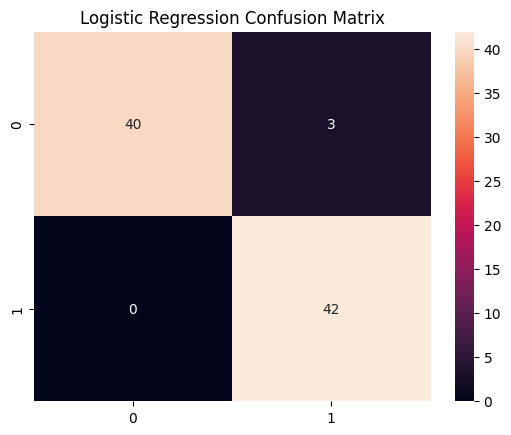

In [21]:
lr = LogisticRegression(penalty='l1', solver = 'liblinear', random_state=42)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
lr_train_acc = round(accuracy_score(y_train, lr.predict(x_train)) *100, 2)   # 소숫점 2자리로 반올림
lr_test_acc = round(accuracy_score(y_test, y_pred)*100, 2)
print('\nAccuracy = ', lr_test_acc, ' %\n')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title('Logistic Regression Confusion Matrix')

### 2) KNN


Accuracy =  95.29  %



Text(0.5, 1.0, 'K-Nearest-Neighbors Confusion Matrix')

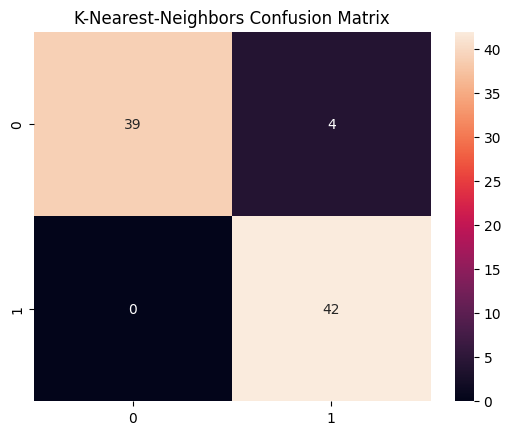

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
knn_train_acc = round(accuracy_score(y_train, lr.predict(x_train)) *100, 2)   # 소숫점 2자리로 반올림
knn_test_acc = round(accuracy_score(y_test, y_pred)*100, 2)
print('\nAccuracy = ', knn_test_acc, ' %\n')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title('K-Nearest-Neighbors Confusion Matrix')

### 3) SVM


Accuracy =  100.0  %



Text(0.5, 1.0, 'Linear Support Vector Machine Confusion Matrix')

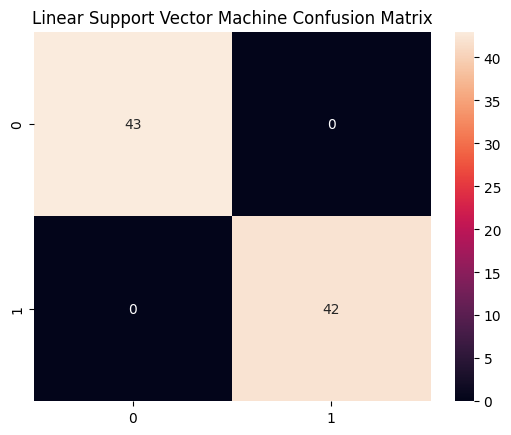

In [23]:
ln_svm = SVC(kernel='linear')
ln_svm.fit(x_train, y_train)
y_pred = ln_svm.predict(x_test)
ln_svm_train_acc = round(accuracy_score(y_train, ln_svm.predict(x_train)) *100, 2)   # 소숫점 2자리로 반올림
ln_svm_test_acc = round(accuracy_score(y_test, y_pred)*100, 2)
print('\nAccuracy = ', ln_svm_test_acc, ' %\n')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title('Linear Support Vector Machine Confusion Matrix')

## 4) Decision Tree


Accuracy =  96.47  %



Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

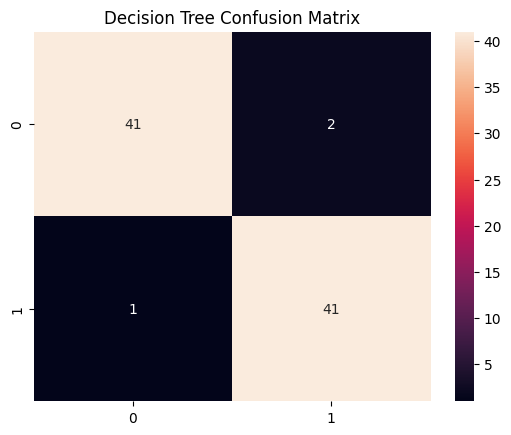

In [24]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(x_train, y_train)

y_pred = tree.predict(x_test)
tree_train_acc = round(accuracy_score(y_train, tree.predict(x_train)) *100, 2)   # 소숫점 2자리로 반올림
tree_test_acc = round(accuracy_score(y_test, y_pred)*100, 2)
print('\nAccuracy = ', tree_test_acc, ' %\n')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title('Decision Tree Confusion Matrix')

## 5) Random Forest


Accuracy =  96.47  %



Text(0.5, 1.0, 'Random Forest Confusion Matrix')

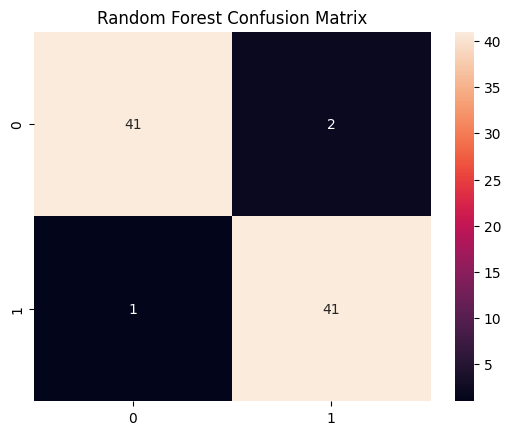

In [25]:
rdm_frst = RandomForestClassifier(n_estimators=5, random_state=10)
rdm_frst.fit(x_train, y_train)

y_pred = rdm_frst.predict(x_test)
rdm_train_acc = round(accuracy_score(y_train, rdm_frst.predict(x_train)) *100, 2)   # 소숫점 2자리로 반올림
rdm_test_acc = round(accuracy_score(y_test, y_pred)*100, 2)
print('\nAccuracy = ', rdm_test_acc, ' %\n')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title('Random Forest Confusion Matrix')

## 6) Gradient Boosting


Accuracy =  91.76  %



Text(0.5, 1.0, 'Gradient Boosting Confusion Matrix')

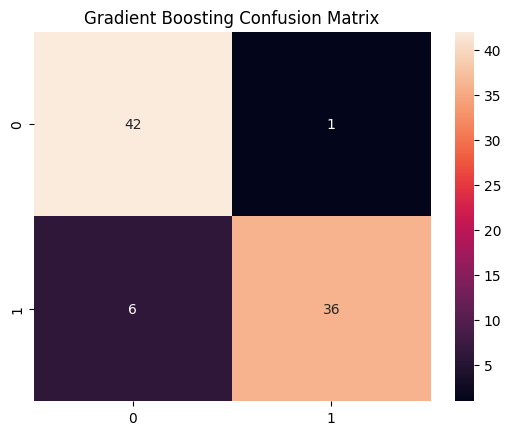

In [26]:
gb = GradientBoostingClassifier(n_estimators=5, random_state=10)
gb.fit(x_train, y_train)

y_pred = gb.predict(x_test)
gb_train_acc = round(accuracy_score(y_train, gb.predict(x_train)) *100, 2)   # 소숫점 2자리로 반올림
gb_test_acc = round(accuracy_score(y_test, y_pred)*100, 2)
print('\nAccuracy = ', gb_test_acc, ' %\n')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title('Gradient Boosting Confusion Matrix')

##  Comparing Classification Models

In [28]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression','K Nearest Neighbors','Linear Support Vector Machines',
        'Decision Tree','Random Forest', 'Gradient Boosting'
    ],
    'Model Accuracy Score': [
       lr_test_acc,knn_test_acc,ln_svm_test_acc,tree_test_acc,rdm_test_acc,gb_test_acc
    ]
})
models.sort_values(by='Model Accuracy Score', ascending=False)

,Model,Model Accuracy Score
2,Linear Support Vector Machines,100.00
0,Logistic Regression,96.47
3,Decision Tree,96.47
4,Random Forest,96.47
1,K Nearest Neighbors,95.29
5,Gradient Boosting,91.76


### Showing data to Image

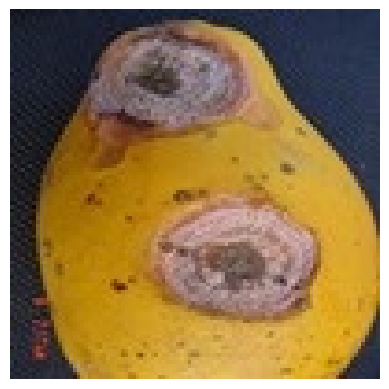

The predicted image is : Diseased


In [44]:
img=cv2.imread("/content/drive/MyDrive/Colab Notebooks/machine vision system project/Diseased/a0_a49.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #brg->rgb
plt.imshow(img)
plt.axis('off')
plt.show()

sample=[img.flatten()]
probability_svm=ln_svm.predict(sample)
print("The predicted image is : "+class_names[probability_svm[0]])

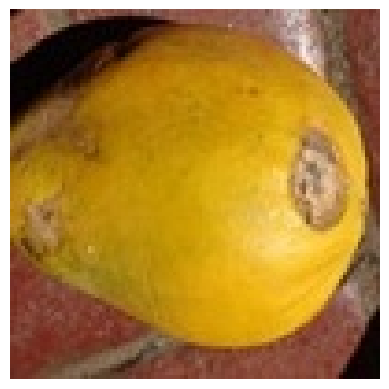

The predicted image is : Diseased


In [45]:
img=cv2.imread("/content/drive/MyDrive/Colab Notebooks/machine vision system project/Diseased/r2_a27.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #brg->rgb
plt.imshow(img)
plt.axis('off')
plt.show()

sample=[img.flatten()]
probability_svm=ln_svm.predict(sample)
print("The predicted image is : "+class_names[probability_svm[0]])

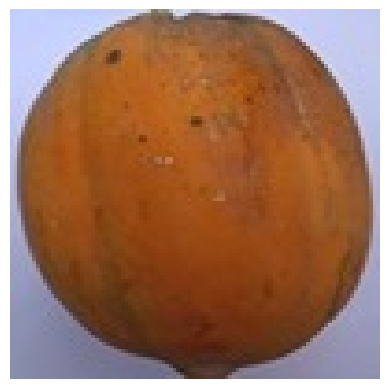

The predicted image is : Healthy


In [46]:
img=cv2.imread("/content/drive/MyDrive/Colab Notebooks/machine vision system project/Healthy/r3_1 (25).jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #brg->rgb
plt.imshow(img)
plt.axis('off')
plt.show()

sample=[img.flatten()]
probability_svm=ln_svm.predict(sample)
print("The predicted image is : "+class_names[probability_svm[0]])